## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

## Read the data

In [3]:
covid_data=pd.read_csv('covid_19_data.csv')

In [4]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Data Cleaning

In [5]:
covid_data.drop('SNo',axis=1,inplace=True)

Dropped the SNo column, because there is already row index in the dataset

In [8]:
covid_data.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

There are object and float data types in the data set.

In [9]:
covid_data['ObservationDate']=pd.to_datetime(covid_data['ObservationDate'],format='%m/%d/%Y')

converted the data type of observationDate into datetime datatype for easy analysing

In [10]:
covid_data.shape

(306429, 7)

The data contains 306429 rows and 7 columns

In [11]:
covid_data.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [12]:
covid_data.isnull().sum()

ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

There are 78100 missing values present in Province/State

In [13]:
covid_data['Province/State'].fillna('Not Available',inplace=True)

Replaced the missing values with string 'Not Available'

## Exploratory Data Analysis

In [14]:
covid_data['Country/Region'].nunique()

229

There are 229 Country/Region included in the data

In [15]:
covid_data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [16]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   306429 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last Update      306429 non-null  object        
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 16.4+ MB


In [17]:
covid_data.describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


These are the statistical informations of covid data

<h1 style="text-align:center">World Wide COVID-19 Informations</h1>

In [18]:
daily_data=covid_data.drop('Province/State',axis=1)
daily_data.sort_values(['Confirmed'],ascending=False).head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
298068,2021-05-19,France,2021-05-20 04:21:05,5863138.0,107390.0,324444.0
297303,2021-05-18,France,2021-05-19 04:20:42,5845010.0,107256.0,323205.0
296538,2021-05-17,France,2021-05-18 04:20:33,5829009.0,107041.0,321874.0
295773,2021-05-16,France,2021-05-17 04:20:34,5825659.0,106845.0,321026.0
295008,2021-05-15,France,2021-05-16 04:20:49,5811711.0,106764.0,320711.0


The Most number of confirmed cases was reported on 19th May 2021 in France

In [19]:
daily_data.sort_values(['Deaths'],ascending=False).head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
305972,2021-05-29,UK,2021-05-30 04:20:55,3910803.0,112385.0,0.0
305207,2021-05-28,UK,2021-05-29 04:20:41,3908214.0,112379.0,0.0
304442,2021-05-27,UK,2021-05-28 04:20:36,3904934.0,112371.0,0.0
303677,2021-05-26,UK,2021-05-27 04:20:59,3902160.0,112363.0,0.0
302912,2021-05-25,UK,2021-05-26 04:20:35,3899813.0,112355.0,0.0


The most number of deaths was reported on 29 th May 2021 in UK

In [20]:
daily_data.sort_values(['Recovered'],ascending=False).head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
179328,2020-12-14,US,2021-04-02 15:13:53,0.0,0.0,6399531.0
178565,2020-12-13,US,2021-04-02 15:13:53,0.0,0.0,6298082.0
177802,2020-12-12,US,2021-04-02 15:13:53,0.0,0.0,6246605.0
177039,2020-12-11,US,2021-04-02 15:13:53,0.0,0.0,6135314.0
176276,2020-12-10,US,2021-04-02 15:13:53,0.0,0.0,5985047.0


The most number of Recovered patient was reported on 14th December 2021 in US

In [21]:
country_wise_data=covid_data.groupby(['Country/Region']).sum()
country_wise_data.head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
Andorra,2379802.0,32100.0,2162473.0
Angola,4764863.0,116489.0,3683041.0
Antigua and Barbuda,143868.0,4059.0,109958.0
Argentina,504802880.0,12112441.0,438750295.0


In [22]:
confirmed=country_wise_data.sort_values('Confirmed',ascending=False)
confirmed.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
US,6.049146e+09,123303762.0,5.033710e+08
India,3.226768e+09,44424723.0,2.900590e+09
Brazil,2.653588e+09,72624610.0,2.313677e+09
Russia,9.305488e+08,18363719.0,7.907057e+08
France,8.551890e+08,22720818.0,6.940743e+07


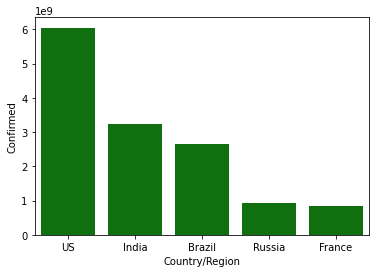

In [23]:
sns.barplot(x=confirmed.index[:5],y=confirmed['Confirmed'][:5],color='green')
plt.show()

The countries such as US, India, Brazil, Russia and France were on the top 5 positions of total covid-19 confirmed cases.

In [24]:
deaths=country_wise_data.sort_values('Deaths',ascending=False)
deaths.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
US,6.049146e+09,123303762.0,5.033710e+08
Brazil,2.653588e+09,72624610.0,2.313677e+09
India,3.226768e+09,44424723.0,2.900590e+09
Mexico,4.604637e+08,43005509.0,3.617802e+08
UK,7.837944e+08,29171984.0,2.327572e+06


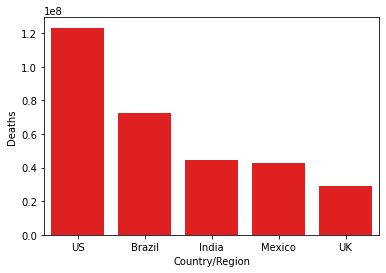

In [25]:
sns.barplot(x=deaths.index[:5],y=deaths['Deaths'][:5],color='red')
plt.show()

The countries such as US, Brazil, India, Mexico and UK were on the top 5 positions of total covid-19 Deaths.

In [26]:
recover=country_wise_data.sort_values('Recovered',ascending=False).head()
recover

,Confirmed,Deaths,Recovered
Country/Region,,,
India,3.226768e+09,44424723.0,2.900590e+09
Brazil,2.653588e+09,72624610.0,2.313677e+09
Russia,9.305488e+08,18363719.0,7.907057e+08
Turkey,6.189410e+08,6841158.0,5.641706e+08
US,6.049146e+09,123303762.0,5.033710e+08


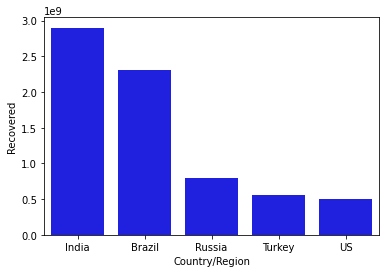

In [27]:
sns.barplot(x=recover.index,y=recover['Recovered'],color='blue')
plt.show()

The countries such as India, Brazil, Russia, Turkey and US were on the top 5 positions of total covid-19 recovery.

In [28]:
covid_data.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.888416,0.633479
Deaths,0.888416,1.000000,0.538416
Recovered,0.633479,0.538416,1.000000


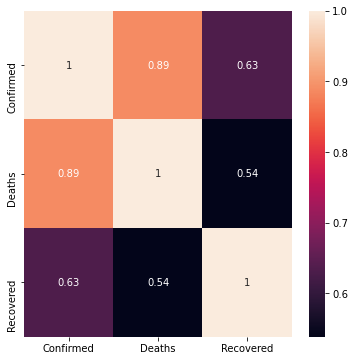

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(covid_data.corr(),annot=True)
plt.show()

In world wide, the relationship between confirmed cases and Death is 0.89. So it indicating that increase of confirmed  cases will increasing chance of deaths. But at the same time relationship between Confirmed and Recovered was only 0.63. 

<h1 style="text-align:center">COVID 19 in India</h1>

In [32]:
country_wise_data.loc['India']

Confirmed    3.226768e+09
Deaths       4.442472e+07
Recovered    2.900590e+09
Name: India, dtype: float64

In [33]:
india_data=covid_data[covid_data['Country/Region']=='India']
india_data.head(n=10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
446,2020-01-30,Not Available,India,1/30/20 16:00,1.0,0.0,0.0
509,2020-01-31,Not Available,India,1/31/2020 23:59,1.0,0.0,0.0
567,2020-02-01,Not Available,India,1/31/2020 8:15,1.0,0.0,0.0
629,2020-02-02,Not Available,India,2020-02-02T06:03:08,2.0,0.0,0.0
696,2020-02-03,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0
766,2020-02-04,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0
838,2020-02-05,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0
911,2020-02-06,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0
986,2020-02-07,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0
1060,2020-02-08,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0


The first case in India was reported on 30th January 2020

In [34]:
india=india_data[india_data['Province/State']!='Unknown']
india

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
446,2020-01-30,Not Available,India,1/30/20 16:00,1.0,0.0,0.0
509,2020-01-31,Not Available,India,1/31/2020 23:59,1.0,0.0,0.0
567,2020-02-01,Not Available,India,1/31/2020 8:15,1.0,0.0,0.0
629,2020-02-02,Not Available,India,2020-02-02T06:03:08,2.0,0.0,0.0
696,2020-02-03,Not Available,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...
306334,2021-05-29,Telangana,India,2021-05-30 04:20:55,574026.0,3247.0,533862.0
306351,2021-05-29,Tripura,India,2021-05-30 04:20:55,50739.0,507.0,43190.0
306377,2021-05-29,Uttar Pradesh,India,2021-05-30 04:20:55,1688152.0,20208.0,1621743.0
306378,2021-05-29,Uttarakhand,India,2021-05-30 04:20:55,327112.0,6360.0,289642.0


Removed the Not avaialable informations from Indian data

In [35]:
india.sort_values('Confirmed',ascending=False).head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306127,2021-05-29,Maharashtra,India,2021-05-30 04:20:55,5713215.0,94030.0,5339838.0
305362,2021-05-28,Maharashtra,India,2021-05-29 04:20:41,5692920.0,93198.0,5307874.0
304597,2021-05-27,Maharashtra,India,2021-05-28 04:20:36,5672180.0,92225.0,5276203.0
303832,2021-05-26,Maharashtra,India,2021-05-27 04:20:59,5650907.0,91341.0,5241833.0
303067,2021-05-25,Maharashtra,India,2021-05-26 04:20:35,5626155.0,90349.0,5218768.0


The most number of confirmed cases were reported on continues days from 25th to 29th days of May in 2021 in Maharashtra state.

In [36]:
india.sort_values('Deaths',ascending=False).head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306127,2021-05-29,Maharashtra,India,2021-05-30 04:20:55,5713215.0,94030.0,5339838.0
305362,2021-05-28,Maharashtra,India,2021-05-29 04:20:41,5692920.0,93198.0,5307874.0
304597,2021-05-27,Maharashtra,India,2021-05-28 04:20:36,5672180.0,92225.0,5276203.0
303832,2021-05-26,Maharashtra,India,2021-05-27 04:20:59,5650907.0,91341.0,5241833.0
303067,2021-05-25,Maharashtra,India,2021-05-26 04:20:35,5626155.0,90349.0,5218768.0


The most number of deaths were also reported on continues days from 25th to 29th days of May in 2021 in Maharashtra state.

In [37]:
india.sort_values('Recovered',ascending=False).head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306127,2021-05-29,Maharashtra,India,2021-05-30 04:20:55,5713215.0,94030.0,5339838.0
305362,2021-05-28,Maharashtra,India,2021-05-29 04:20:41,5692920.0,93198.0,5307874.0
304597,2021-05-27,Maharashtra,India,2021-05-28 04:20:36,5672180.0,92225.0,5276203.0
303832,2021-05-26,Maharashtra,India,2021-05-27 04:20:59,5650907.0,91341.0,5241833.0
303067,2021-05-25,Maharashtra,India,2021-05-26 04:20:35,5626155.0,90349.0,5218768.0


The most number of recovered patients  were also reported on continues days from 25th to 29th days of May in 2021 in Maharashtra state.

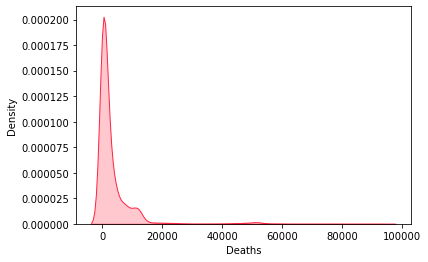

In [38]:
sns.kdeplot(india['Deaths'],color='#FF2442',shade=True)
plt.show()

In most of times,the  number of covid death per day occured in the range between 0 to 20000

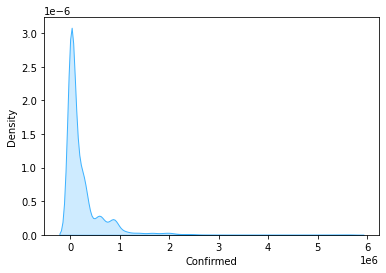

In [39]:
sns.kdeplot(india['Confirmed'],color='#3DB2FF',shade=True)
plt.show()

In most of times,the  number of confirmed cases per day occured in the range between 0 to 100000

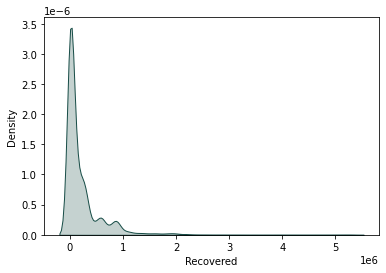

In [40]:
sns.kdeplot(india['Recovered'],color='#184D47',shade=True)
plt.show()

In most of times,the  number of patients recovered per day occured in the range between 0 to 100000

## State wise  covid informations in India 

In [41]:
states=india.groupby(['Province/State']).sum()
states.head(n=10)

,Confirmed,Deaths,Recovered
Province/State,,,
Andaman and Nicobar Islands,1395784.0,17867.0,1319037.0
Andhra Pradesh,254740494.0,2013926.0,237562013.0
Arunachal Pradesh,4363201.0,13602.0,4037123.0
Assam,62475956.0,304170.0,57704484.0
Bihar,80951413.0,454187.0,74751758.0
Chandigarh,6357766.0,89132.0,5701850.0
Chhattisgarh,91207882.0,1084634.0,80678518.0
Dadar Nagar Haveli,22.0,0.0,2.0
Dadra and Nagar Haveli and Daman and Diu,1189327.0,729.0,1097315.0


In [42]:
states.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.931780,0.999594
Deaths,0.931780,1.000000,0.926263
Recovered,0.999594,0.926263,1.000000


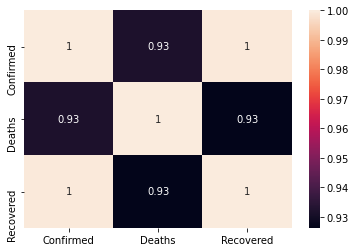

In [43]:
sns.heatmap(states.corr(),annot=True)
plt.show()

In india, the relationship between confirmed cases and deaths is 0.93. This was more than the world wide.The relationship between recovered and confirmed is 1.00.

## States in India with higher than total average cases registered

In [44]:
states_details=states.groupby(['Province/State']).sum()
covid=['Confirmed','Deaths','Recovered']
for values in covid:
    print("========",values,"=========\n")
    higher=states_details[states_details[values]>=states_details[values].mean()]
    print(higher.sort_values(values,ascending=False),"\n\n\n")

======== Confirmed =========

                  Confirmed      Deaths    Recovered
Province/State                                      
Maharashtra     681186928.0  14980930.0  597480809.0
Karnataka       282256260.0   3556197.0  247785356.0
Andhra Pradesh  254740494.0   2013926.0  237562013.0
Tamil Nadu      252446204.0   3591326.0  233139980.0
Kerala          238933212.0    887344.0  211067978.0
Uttar Pradesh   187890669.0   2509220.0  168933490.0
Delhi           181975872.0   3111860.0  170506773.0
West Bengal     154070425.0   2558538.0  141428487.0
Odisha           93666792.0    467290.0   87172957.0
Rajasthan        92628339.0    818922.0   81794841.0
Chhattisgarh     91207882.0   1084634.0   80678518.0
Telangana        84952428.0    481250.0   77992105.0 



======== Deaths =========

                  Confirmed      Deaths    Recovered
Province/State                                      
Maharashtra     681186928.0  14980930.0  597480809.0
Tamil Nadu      252446204.0   3591326.

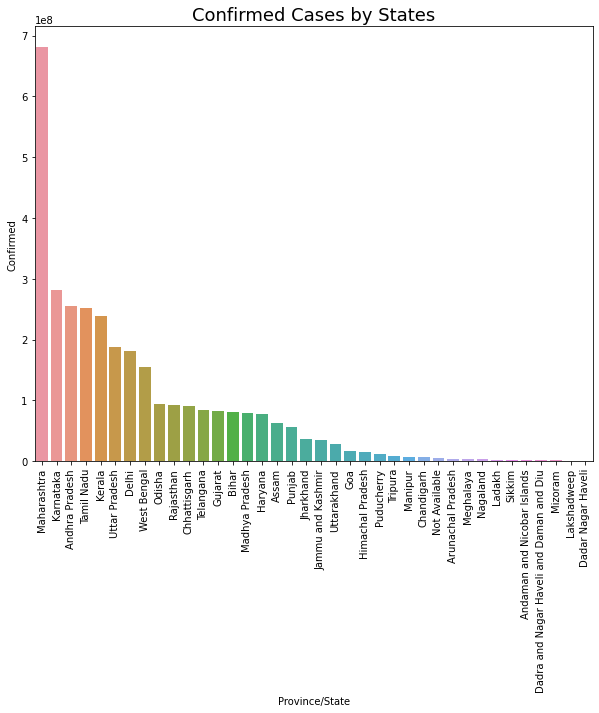

In [45]:
states=states.sort_values(by='Confirmed',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=states.index,y=states['Confirmed'])
plt.title('Confirmed Cases by States',size=18)
plt.xticks(rotation=90)
plt.show()    

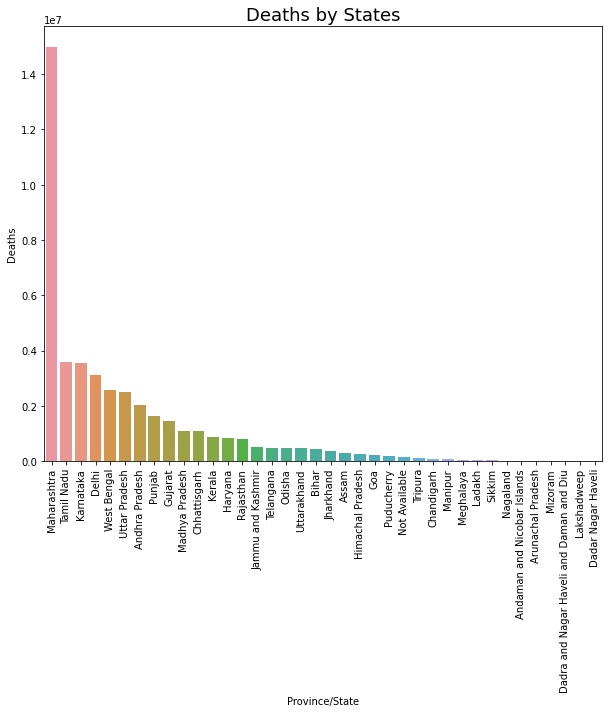

In [46]:
states=states.sort_values(by='Deaths',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=states.index,y=states['Deaths'])
plt.title('Deaths by States',size=18)
plt.xticks(rotation=90)
plt.show()   

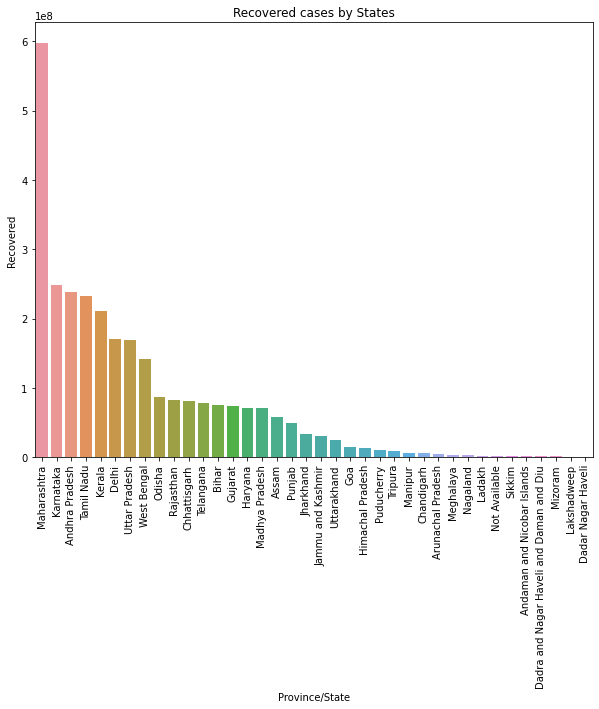

In [47]:
states=states.sort_values(by='Recovered',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=states.index,y=states['Recovered'])
plt.title('Recovered cases by States')
plt.xticks(rotation=90)
plt.show()

In all situations, Maharashtra was on the top position in India and Dadar Nagar Haveli was on the last positions.

## Covid informations about Maharashtra

In [48]:
mh=india[india['Province/State']=='Maharashtra']
mh

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
39515,2020-06-10,Maharashtra,India,2021-04-02 15:13:53,90787.0,3289.0,42638.0
40244,2020-06-11,Maharashtra,India,2021-04-02 15:13:53,97648.0,3590.0,46078.0
40977,2020-06-12,Maharashtra,India,2021-04-02 15:13:53,97648.0,3590.0,46078.0
41710,2020-06-13,Maharashtra,India,2021-04-02 15:13:53,101141.0,3717.0,47796.0
42443,2020-06-14,Maharashtra,India,2021-04-02 15:13:53,104568.0,3830.0,49346.0
...,...,...,...,...,...,...,...
303067,2021-05-25,Maharashtra,India,2021-05-26 04:20:35,5626155.0,90349.0,5218768.0
303832,2021-05-26,Maharashtra,India,2021-05-27 04:20:59,5650907.0,91341.0,5241833.0
304597,2021-05-27,Maharashtra,India,2021-05-28 04:20:36,5672180.0,92225.0,5276203.0
305362,2021-05-28,Maharashtra,India,2021-05-29 04:20:41,5692920.0,93198.0,5307874.0


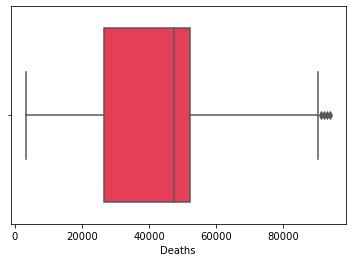

In [49]:
sns.boxplot(mh['Deaths'],color='#FF2442')
plt.show()

In Maharasthra, the covid deaths happened mainly in between range of 20000 to 60000 per day.

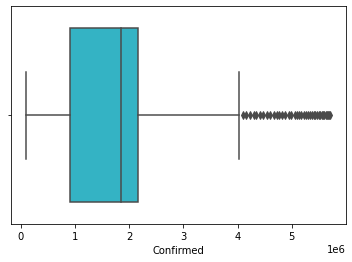

In [50]:
sns.boxplot(mh['Confirmed'],color='#1CC5DC')
plt.show()

In Maharasthra, the covid confirmed cases registered mainly in between the range of 100000 to 200000 per day.

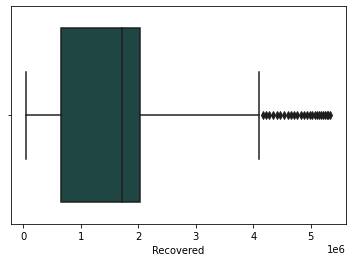

In [51]:
sns.boxplot(mh['Recovered'],color='#184D47')
plt.show()

In Maharasthra, the covid recovered patients number  mainly in between range of 100000 to 200000 per day.

In [52]:
mh.set_index('ObservationDate',inplace=True)

In [53]:
mh.index=pd.to_datetime(mh.index,format='%m/%d/%Y')
mhm=mh.resample('M').sum()
mhm

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-06-30,2724463.0,120887.0,1377598.0
2020-07-31,9014139.0,349835.0,5060980.0
2020-08-31,18598274.0,619584.0,13012593.0
2020-09-30,33137519.0,920023.0,24330986.0
2020-10-31,48444892.0,1276328.0,41237595.0
2020-11-30,52546687.0,1376175.0,48384854.0
2020-12-31,58410903.0,1501374.0,54772485.0
2021-01-31,61520265.0,1560965.0,58406655.0
2021-02-28,58121612.0,1444013.0,55399492.0


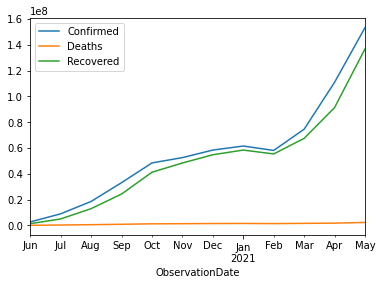

In [54]:
mhm.plot()
plt.show()

Here we can see that, intensity of covid increases from february 2021 onwards.There is huge difference between before february and after that. The number cases were doubled from previous in that period

# Conclusion

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease has since spread worldwide, leading to an ongoing pandemic.

Covid 19 mostly affected in countries such as US, India, Brazil, Russia, Russia, UK, Turkey and France.
<li>US holding the first position for the most number of confirmed COVID-19 cases by total and  India, Brazil, Russia and France were on following positions</li>
<li>The countries such as US, Brazil, India, Mexico and UK were on the top 5 positions of total covid-19 Deaths.</li>
<li>The countries such as India, Brazil, Russia, Turkey and US were on the top 5 positions of total covid-19 recovery.</li>

In India, COVID-19 mostly affected in Maharshtra.
<li>The most frequently registered daily cases were in between the range of 1 to 2 lakh.</li>
<li>The most frequently registered deaths per days  were in between the range of 20000 to 60000.</li>
<li> In the months of February, March, April and May, there is huge hike in terms of number covid cases in India.



The Covid deaths and Confirmed cases were highly correlated in India , which is greater than World ratio. But the recovery ratio is much higher. so it giving some relax to Indians and but at the same time , the increase in last months giving some warnings as well.